In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def iniciar():
    cap = cv2.VideoCapture(0)
    print("Pressione a tecla q para sair")

    while True:

        # captura dos quadros
        _, frame = cap.read()

        # conversão para HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Intervalo escolhido - cor verde
        lower = np.array([25, 189, 118])
        upper = np.array([95, 255, 198])

        # Limiar na imagem
        mask = cv2.inRange(hsv, lower, upper)
        maskCopy = mask

        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame, frame, mask=maskCopy)

        # Procura dos contornos

        im2, contours, hierarchy = cv2.findContours(maskCopy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Ordena todos os contornos com os maiores primeiro

        cnts_sorted = sorted(contours, key=cv2.contourArea, reverse=True)[:2]

        cnts_largest = cnts_sorted[0]

        cv2.drawContours(res, cnts_sorted, 0, (0, 0, 255), 3)
        cv2.drawContours(frame, cnts_sorted, 0, (0, 0, 255), 3)

        # Busca do centroide

        M = cv2.moments(cnts_largest)

        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        cv2.circle(res, (cx, cy), 10, (0, 255, 0), -1)
        cv2.imshow('frame', frame)
        cv2.imshow('mask', mask)
        cv2.imshow('res', res)

        if cv2.waitKey(1) & 0xFF == ord("q"):            
            break

    cv2.destroyAllWindows()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)   

    # Imprimir
    plt.rcParams['figure.figsize'] = (16,16)
    plt.subplot(1, 3, 1)   
    plt.imshow(frame, "gray")
    plt.title("original")
    plt.subplot(1, 3, 2)   
    plt.imshow(mask, 'gray')
    plt.title("máscara")
    plt.subplot(1, 3, 3)   
    plt.imshow(res, 'gray')
    plt.title("Resultado")
    plt.show()  

Pressione a tecla q para sair


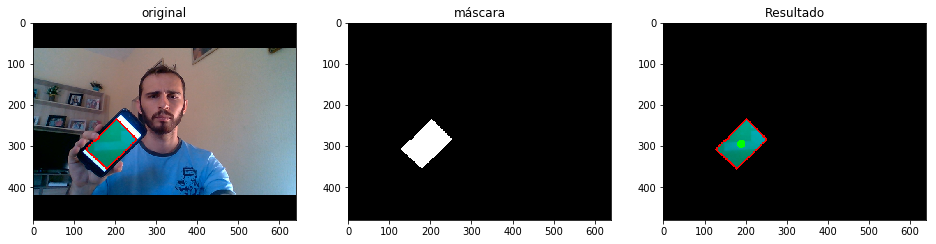

In [2]:
iniciar()